In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen

%cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

/content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
# Load the dataset
file_path = '01.Dataset-Rofiqul/agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for review
data.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


## Detect Nilai NaN

In [5]:

missing_values_count = data.isna().sum()
missing_values_count

,0
Date,0
Year,0
Experiment,0
DataUse,0
Replication,0
Month,0
Vegetation,0
VegType,0
N2O,0
N_rate,0


## Impute NaN or missing value with Mean

In [6]:
# Impute missing values with the mean of the respective columns
data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
data['NH4'].fillna(data['NH4'].mean(), inplace=True)
data['NO3'].fillna(data['NO3'].mean(), inplace=True)

# Verify that there are no missing values left
missing_values_after_imputation = data.isna().sum()
missing_values_after_imputation

<ipython-input-6-9bd11bf3eef9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WFPS25cm'].fillna(data['WFPS25cm'].mean(), inplace=True)
<ipython-input-6-9bd11bf3eef9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,0
Date,0
Year,0
Experiment,0
DataUse,0
Replication,0
Month,0
Vegetation,0
VegType,0
N2O,0
N_rate,0


In [7]:
# Save the cleaned dataset to a new CSV file
output_file_path = '01.Dataset-Rofiqul/001.input_NaN_mean_agriculture_dataset.csv'
data.to_csv(output_file_path, index=False)

output_file_path

'01.Dataset-Rofiqul/001.input_NaN_mean_agriculture_dataset.csv'

## StandardScaler

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the scaled dataset to a new CSV file
scaled_output_file_path = '01.Dataset-Rofiqul/002.standard_scaler_agriculture_dataset.csv'
data.to_csv(scaled_output_file_path, index=False)

# Display the head of the scaled dataset
scaled_data_head = data.head()
scaled_data_head, scaled_output_file_path

(      Date      Year Experiment   DataUse Replication     Month Vegetation  \
 0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
 4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   
 
   VegType       N2O    N_rate  ...       PP7      AirT    DAF_TD    DAF_SD  \
 0  Annual -0.125408  0.481233  ... -0.811416 -1.518617  0.556855  0.294676   
 1  Annual -0.185324  0.481233  ... -0.811416 -1.560776  0.563758  0.301675   
 2  Annual -0.137842  0.481233  ... -0.447138 -1.276207  0.618974  0.357667   
 3  Annual -0.144855  0.481233  ... -0.468640 -1.708330  0.625877  0.364667   
 4  Annual -0.158726  0.481233  ... -0.457678  0.547142  0.805331  0.546643   
 
    WFPS25cm       NH4       NO3      Clay      

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


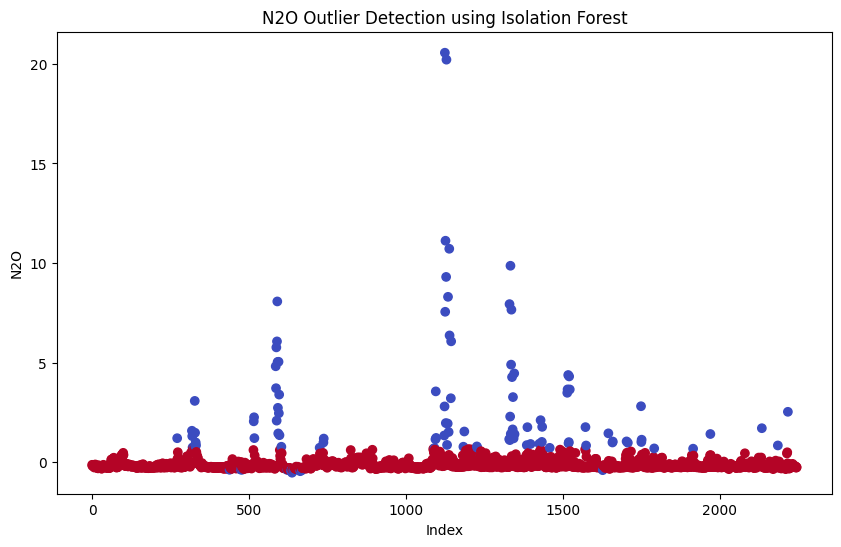

In [10]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['Outlier'] = iso_pred

# Visualize the outliers

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['N2O'], c=data['Outlier'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('N2O')
plt.title('N2O Outlier Detection using Isolation Forest')
plt.savefig('01.Dataset-Rofiqul/Visual/001_IF_outlier_scatter_plots.png')

plt.show()
# Filter data to remove outliers
filtered_data = data[data['Outlier'] == 1]


# Display filtered data
# import ace_tools as tools; tools.display_dataframe_to_user(name="Filtered Data without Outliers", dataframe=filtered_data)

In [11]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-1.518617,0.556855,0.294676,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-1.560776,0.563758,0.301675,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-1.276207,0.618974,0.357667,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-1.708330,0.625877,0.364667,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.547142,0.805331,0.546643,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.168496,-0.195475,-0.223257,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.713393,0.011589,-0.013285,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.713393,0.011589,-0.013285,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.713393,0.011589,-0.013285,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


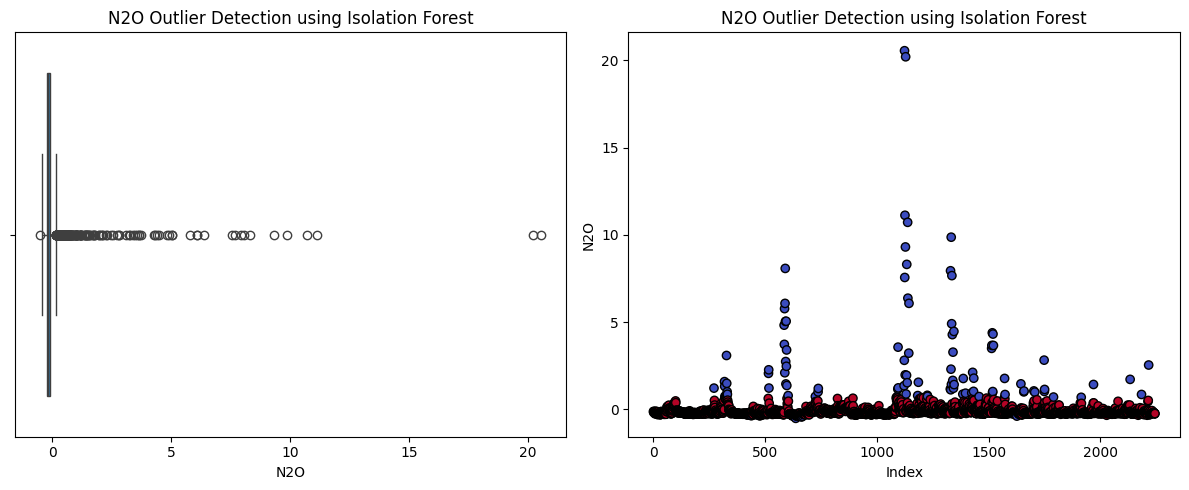

Filtered data has been saved to 'filtered_agriculture_dataset.csv'
            Date      Year Experiment   DataUse Replication     Month  \
0         2/9/12  0.020682   BCSE_KBS  Building          R1  February   
1        2/10/12  0.020682   BCSE_KBS  Building          R1  February   
2        2/18/12  0.020682   BCSE_KBS  Building          R1  February   
3        2/19/12  0.020682   BCSE_KBS  Building          R1  February   
4        3/16/12  0.020682   BCSE_KBS  Building          R1     March   
...          ...       ...        ...       ...         ...       ...   
2241  10/16/2013  0.297184    MCSE-T2   Testing          R4   October   
2242  11/15/2013  0.297184    MCSE-T2   Testing          R1  November   
2243  11/15/2013  0.297184    MCSE-T2   Testing          R2  November   
2244  11/15/2013  0.297184    MCSE-T2   Testing          R3  November   
2245  11/15/2013  0.297184    MCSE-T2   Testing          R4  November   

     Vegetation VegType       N2O    N_rate  ...      Ai

In [12]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Outlier Detection using Isolation Forest')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(data.index, data['N2O'], c=data['Outlier'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Outlier Detection using Isolation Forest')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')
plt.savefig('01.Dataset-Rofiqul/Visual/001_IF_outlier_detection_scatter_plots.png')
# Show the combined figure
plt.tight_layout()
plt.show()


# Filter data to remove outliers
filtered_data = data[data['Outlier'] == 1]

# Save the filtered data to a new CSV file
filtered_data.to_csv('01.Dataset-Rofiqul/003.after_outlier_filtered_agriculture_dataset.csv', index=False)
print("Filtered data has been saved to 'filtered_agriculture_dataset.csv'")

# Display filtered data
print(filtered_data)


## Detect Outlier With Z-Score and IQR

In [13]:
# Extract the N2O column
N2O_data = data['N2O']

# Detect outliers using IQR method
Q1 = N2O_data.quantile(0.25)
Q3 = N2O_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound_IQR = Q1 - 1.5 * IQR
upper_bound_IQR = Q3 + 1.5 * IQR
outliers_IQR = N2O_data[(N2O_data < lower_bound_IQR) | (N2O_data > upper_bound_IQR)]

# Detect outliers using Z-score method
mean = N2O_data.mean()
std = N2O_data.std()
threshold = 3
lower_bound_Z = mean - threshold * std
upper_bound_Z = mean + threshold * std
outliers_Z = N2O_data[(N2O_data < lower_bound_Z) | (N2O_data > upper_bound_Z)]

# Create a summary table
summary_table = pd.DataFrame({
    'Method': ['IQR', 'Z-Score'],
    'Lower Bound': [lower_bound_IQR, lower_bound_Z],
    'Upper Bound': [upper_bound_IQR, upper_bound_Z],
    'Outlier Count': [outliers_IQR.count(), outliers_Z.count()]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/004.after_outlier_N2O_outlier_summary_IQR_ZScore.csv'
summary_table.to_csv(summary_file_path, index=False)

In [14]:
# Function to calculate IQR bounds
def iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to calculate Z-score bounds
def z_score_bounds(series, threshold=3):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    return lower_bound, upper_bound

In [15]:
# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/004_1.after_outlier_numerical_columns_outlier_summary.csv'
summary_table.to_csv(summary_file_path, index=False)
summary_table

,Method,Lower Bound,Upper Bound,Outlier Count
0,IQR,-0.491163,0.166560,251
1,Z-Score,-3.000668,3.000668,32


In [16]:
# Detect outliers and create summary table
summary_table = []
numerical_columns = data.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])
    lower_bound_Z, upper_bound_Z = z_score_bounds(data[col])

    outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]
    outliers_Z = data[(data[col] < lower_bound_Z) | (data[col] > upper_bound_Z)][col]

    summary_table.append({
        'Column': col,
        'Method': 'IQR',
        'Lower Bound': lower_bound_IQR,
        'Upper Bound': upper_bound_IQR,
        'Outlier Count': outliers_IQR.count()
    })

    summary_table.append({
        'Column': col,
        'Method': 'Z-Score',
        'Lower Bound': lower_bound_Z,
        'Upper Bound': upper_bound_Z,
        'Outlier Count': outliers_Z.count()
    })

summary_df = pd.DataFrame(summary_table)

In [17]:
# Visualize the outliers using box plots, histograms, and scatter plots
for col in numerical_columns:
    lower_bound_IQR, upper_bound_IQR = iqr_bounds(data[col])
    lower_bound_Z, upper_bound_Z = z_score_bounds(data[col])

    outliers_IQR = data[(data[col] < lower_bound_IQR) | (data[col] > upper_bound_IQR)][col]
    outliers_Z = data[(data[col] < lower_bound_Z) | (data[col] > upper_bound_Z)][col]

    fig, axs = plt.subplots(3, 2, figsize=(10, 12))

    # Box Plot - IQR Outliers
    sns.boxplot(x=data[col], ax=axs[0, 0])
    axs[0, 0].set_title(f'{col} - Box Plot with IQR Outliers')
    axs[0, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
    axs[0, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
    axs[0, 0].set_xlabel(col)

    # Box Plot - Z-Score Outliers
    sns.boxplot(x=data[col], ax=axs[0, 1])
    axs[0, 1].set_title(f'{col} - Box Plot with Z-Score Outliers')
    axs[0, 1].axvline(lower_bound_Z, color='r', linestyle='--')
    axs[0, 1].axvline(upper_bound_Z, color='r', linestyle='--')
    axs[0, 1].set_xlabel(col)

    # Histogram - IQR Outliers
    sns.histplot(data[col], kde=True, ax=axs[1, 0])
    axs[1, 0].set_title(f'{col} - Histogram with IQR Outliers')
    axs[1, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
    axs[1, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
    axs[1, 0].set_xlabel(col)
    axs[1, 0].set_ylabel('Frequency')

    # Histogram - Z-Score Outliers
    sns.histplot(data[col], kde=True, ax=axs[1, 1])
    axs[1, 1].set_title(f'{col} - Histogram with Z-Score Outliers')
    axs[1, 1].axvline(lower_bound_Z, color='r', linestyle='--')
    axs[1, 1].axvline(upper_bound_Z, color='r', linestyle='--')
    axs[1, 1].set_xlabel(col)
    axs[1, 1].set_ylabel('Frequency')

    # Scatter Plot - IQR Outliers
    axs[2, 0].scatter(data.index, data[col], edgecolor='k')
    axs[2, 0].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
    axs[2, 0].set_title(f'{col} - Scatter Plot with IQR Outliers')
    axs[2, 0].set_xlabel('Index')
    axs[2, 0].set_ylabel(col)

    # Scatter Plot - Z-Score Outliers
    axs[2, 1].scatter(data.index, data[col], edgecolor='k')
    axs[2, 1].scatter(outliers_Z.index, outliers_Z, color='r', edgecolor='k')
    axs[2, 1].set_title(f'{col} - Scatter Plot with Z-Score Outliers')
    axs[2, 1].set_xlabel('Index')
    axs[2, 1].set_ylabel(col)
    plt.savefig('01.Dataset-Rofiqul/Visual/002_ZscoreIQR_outlier_scatter_plots.png')
    # Adjust layout
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


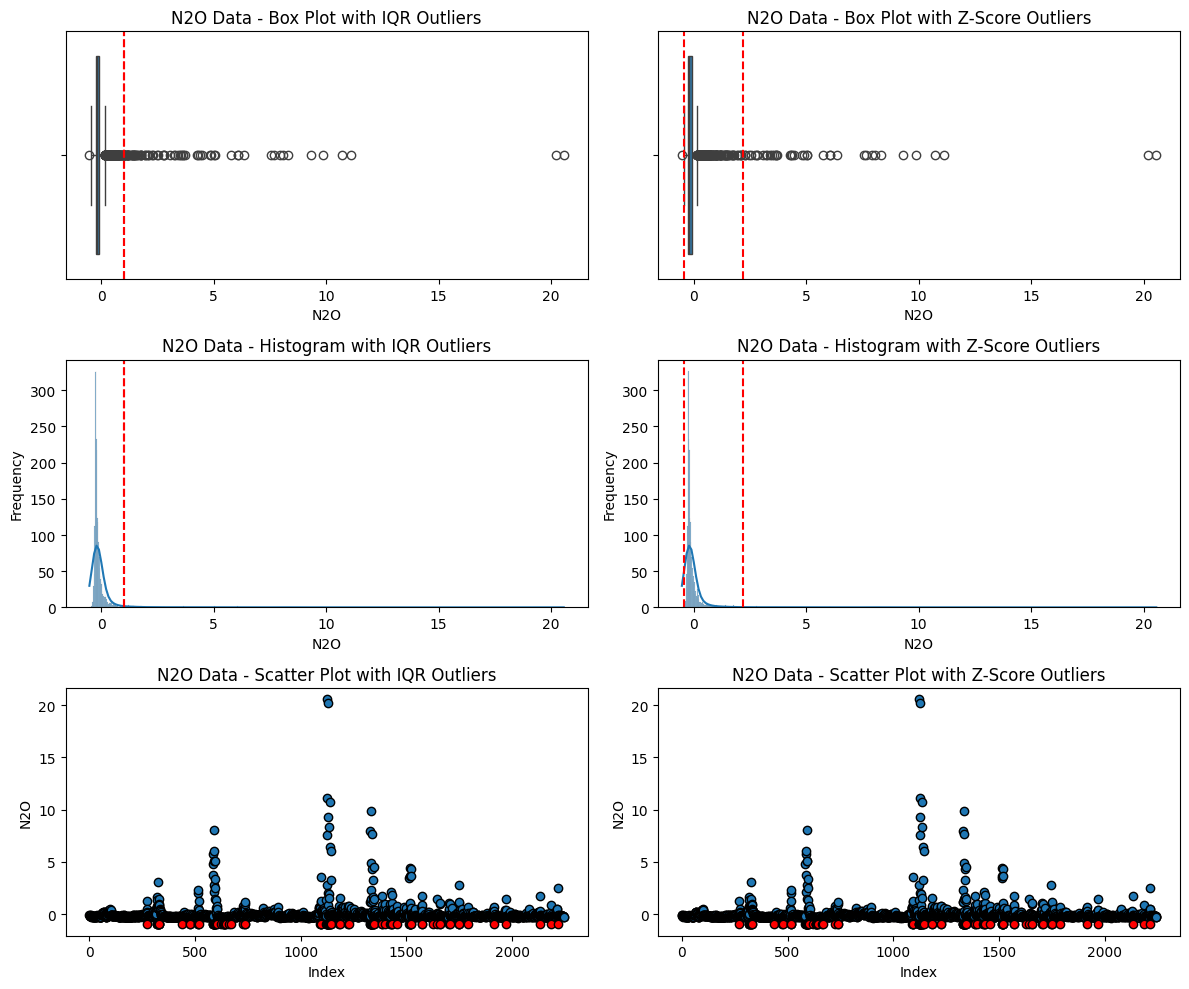

In [18]:


# Display the summary table
# import ace_tools as tools; tools.display_dataframe_to_user(name="N2O Outlier Summary", dataframe=summary_table)

# Visualize the outliers using box plots and scatter plots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Box Plot - N2O Data with IQR Outliers
sns.boxplot(x=N2O_data, ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IQR Outliers')
axs[0, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
axs[0, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with Z-Score Outliers
sns.boxplot(x=N2O_data, ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with Z-Score Outliers')
axs[0, 1].axvline(lower_bound_Z, color='r', linestyle='--')
axs[0, 1].axvline(upper_bound_Z, color='r', linestyle='--')
axs[0, 1].set_xlabel('N2O')

# Histogram - N2O Data with IQR Outliers
sns.histplot(N2O_data, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IQR Outliers')
axs[1, 0].axvline(lower_bound_IQR, color='r', linestyle='--')
axs[1, 0].axvline(upper_bound_IQR, color='r', linestyle='--')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with Z-Score Outliers
sns.histplot(N2O_data, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with Z-Score Outliers')
axs[1, 1].axvline(lower_bound_Z, color='r', linestyle='--')
axs[1, 1].axvline(upper_bound_Z, color='r', linestyle='--')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IQR Outliers
axs[2, 0].scatter(N2O_data.index, N2O_data, edgecolor='k')
axs[2, 0].scatter(outliers_IQR.index, outliers_IQR, color='r', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IQR Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - N2O Data with Z-Score Outliers
axs[2, 1].scatter(N2O_data.index, N2O_data, edgecolor='k')
axs[2, 1].scatter(outliers_Z.index, outliers_Z, color='r', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with Z-Score Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Adjust layout
plt.savefig('01.Dataset-Rofiqul/Visual/002_ZScoreIQR_outlier_detection.png')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


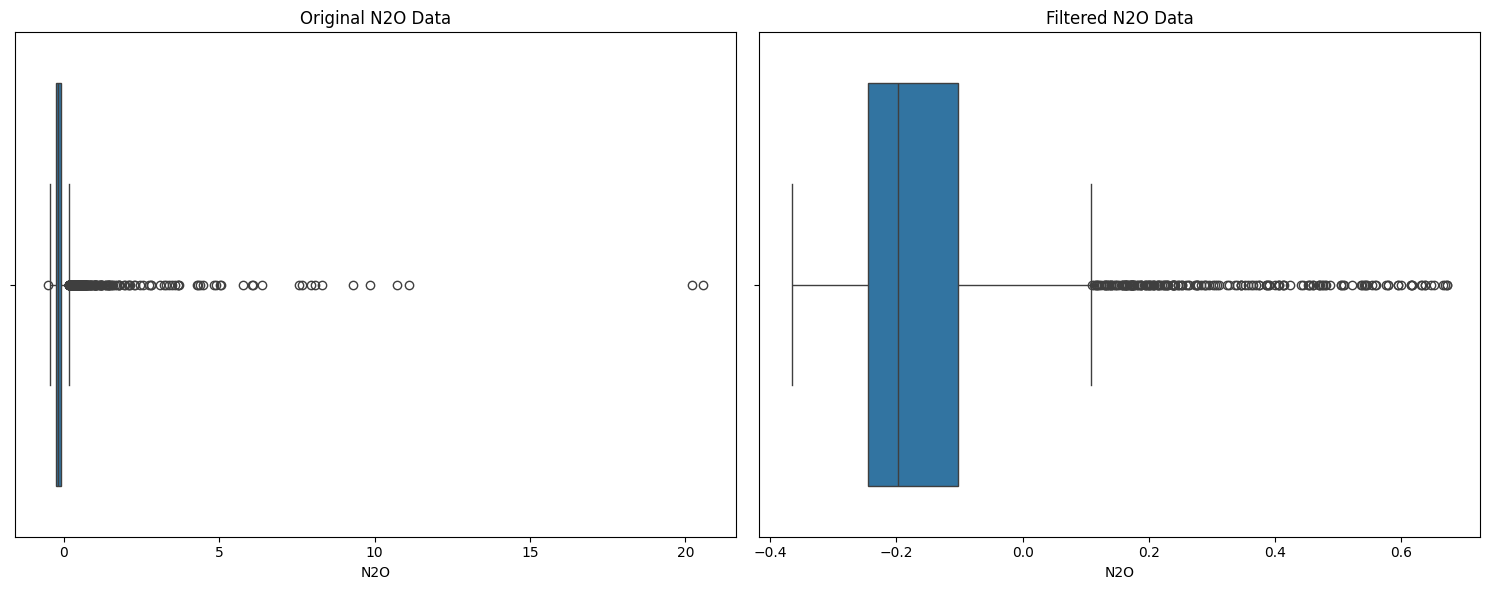

In [19]:
# Box Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['N2O'])
plt.title('Original N2O Data')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_data['N2O'])
plt.title('Filtered N2O Data')
plt.savefig('01.Dataset-Rofiqul/Visual/003_outlier_VS_Filtered_Comparison.png')
plt.tight_layout()
plt.show()





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


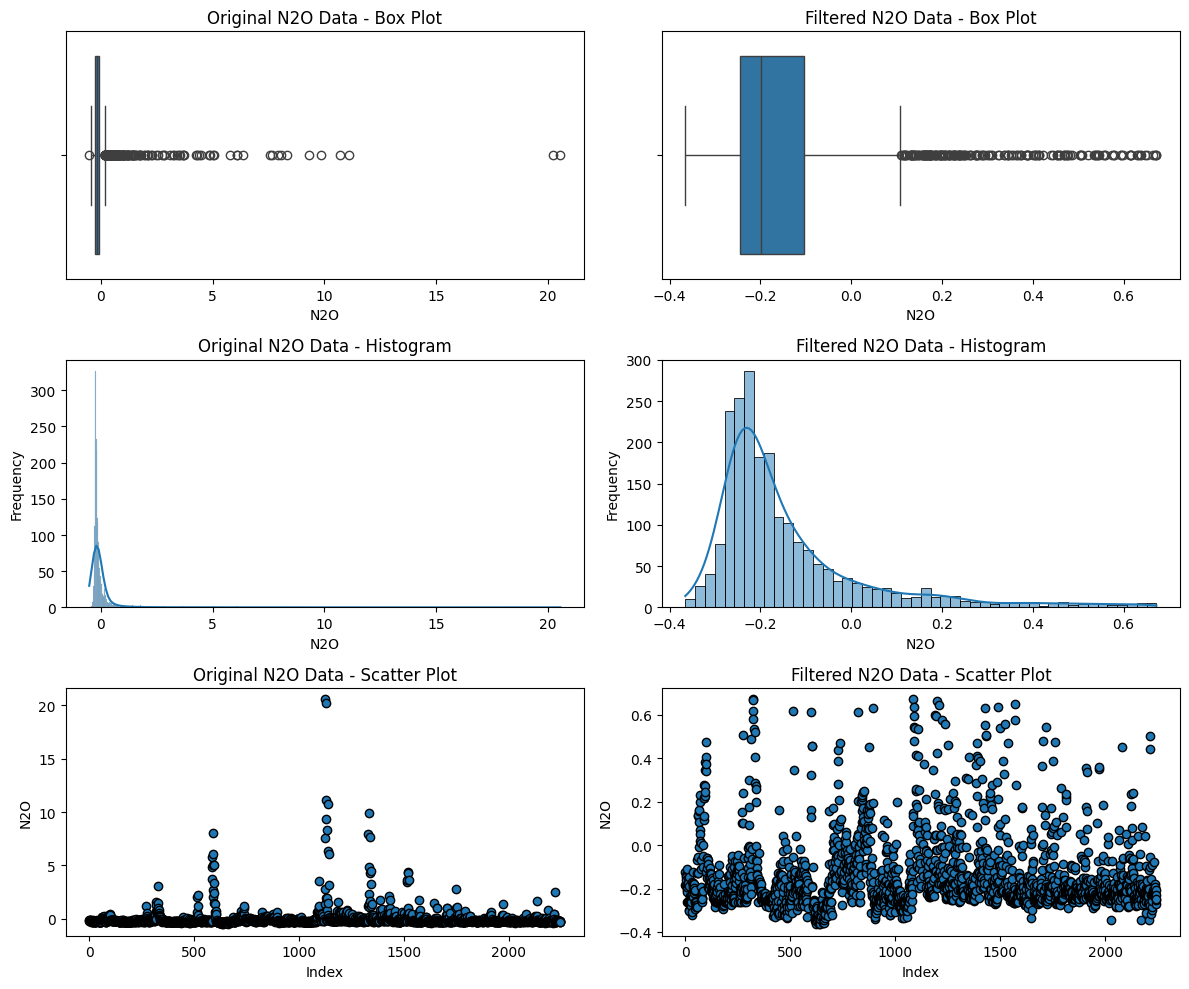

In [20]:
# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 2, figsize=(12, 10))



# Box Plot - Original N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Original N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Filtered N2O Data
sns.boxplot(x=filtered_data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Filtered N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Histogram - Original N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Original N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Filtered N2O Data
sns.histplot(filtered_data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Filtered N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - Original N2O Data
axs[2, 0].scatter(data.index, data['N2O'], edgecolor='k')
axs[2, 0].set_title('Original N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Filtered N2O Data
axs[2, 1].scatter(filtered_data.index, filtered_data['N2O'], edgecolor='k')
axs[2, 1].set_title('Filtered N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Adjust layout
plt.savefig('01.Dataset-Rofiqul/Visual/003_1_outlier_VS_Filtered_Comparison.png')
plt.tight_layout()
plt.show()



## Detect Outliers with DBSCAN

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


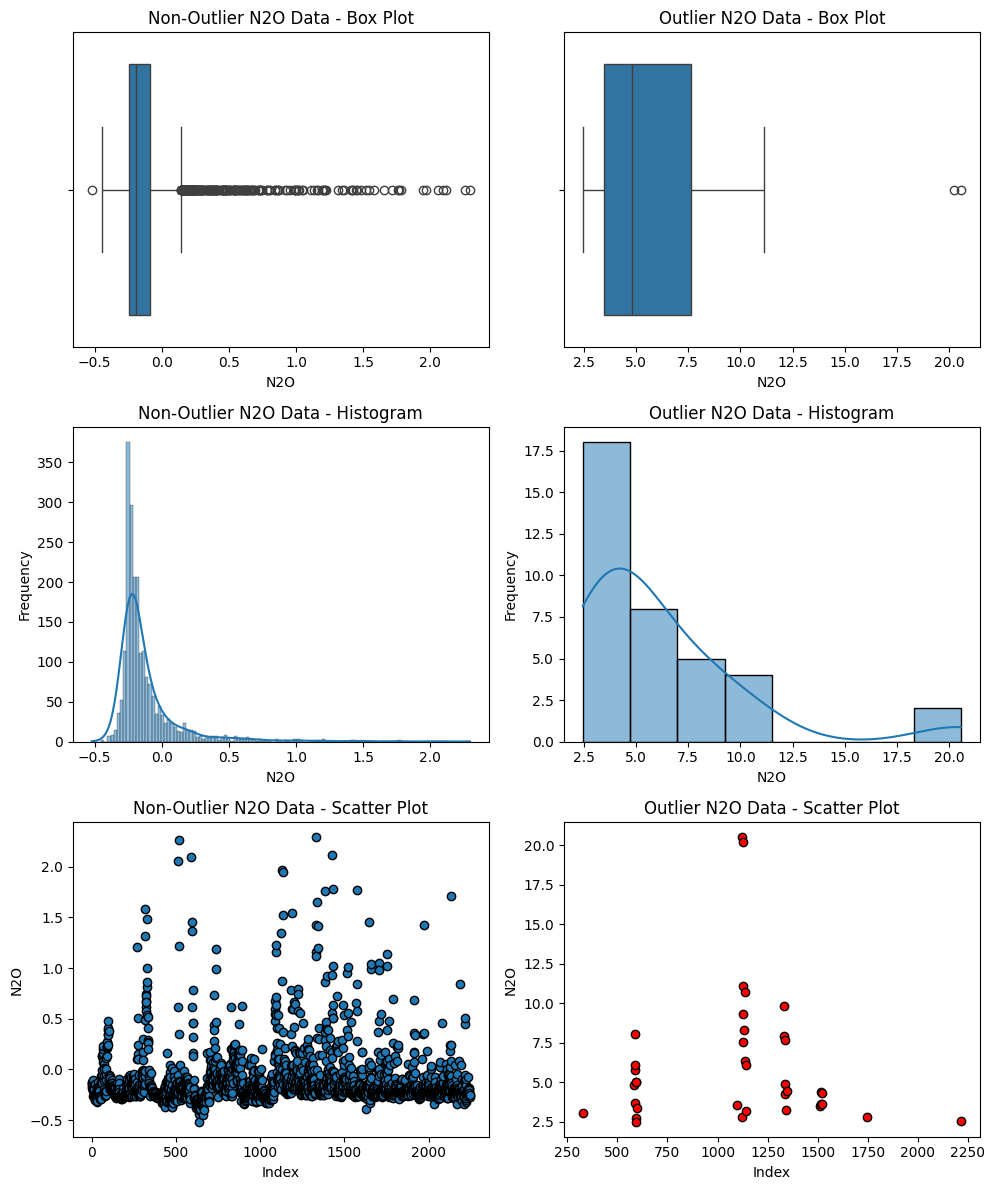

In [21]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['Outlier'] = dbscan_pred

# Separate outliers and non-outliers
outliers = data[data['Outlier'] == -1]
non_outliers = data[data['Outlier'] != -1]

# Create a figure with 2 columns and 3 rows
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Box Plot - Original N2O Data
sns.boxplot(x=non_outliers['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('Non-Outlier N2O Data - Box Plot')
axs[0, 0].set_xlabel('N2O')

# Box Plot - Outlier N2O Data
sns.boxplot(x=outliers['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('Outlier N2O Data - Box Plot')
axs[0, 1].set_xlabel('N2O')

# Histogram - Non-Outlier N2O Data
sns.histplot(non_outliers['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Non-Outlier N2O Data - Histogram')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - Outlier N2O Data
sns.histplot(outliers['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Outlier N2O Data - Histogram')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Scatter Plot - Non-Outlier N2O Data
axs[2, 0].scatter(non_outliers.index, non_outliers['N2O'], edgecolor='k')
axs[2, 0].set_title('Non-Outlier N2O Data - Scatter Plot')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - Outlier N2O Data
axs[2, 1].scatter(outliers.index, outliers['N2O'], edgecolor='k', color='red')
axs[2, 1].set_title('Outlier N2O Data - Scatter Plot')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Adjust layout
plt.savefig('01.Dataset-Rofiqul/Visual/004_DBSCAN_outlier_VS_Filtered_Comparison.png')
plt.tight_layout()
plt.show()

# Display filtered data without outliers
filtered_data = non_outliers.drop(columns=['Outlier'])


## Detect Outlier with OneClass SVM

          Method  Outlier Count
0  One-Class SVM            112


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


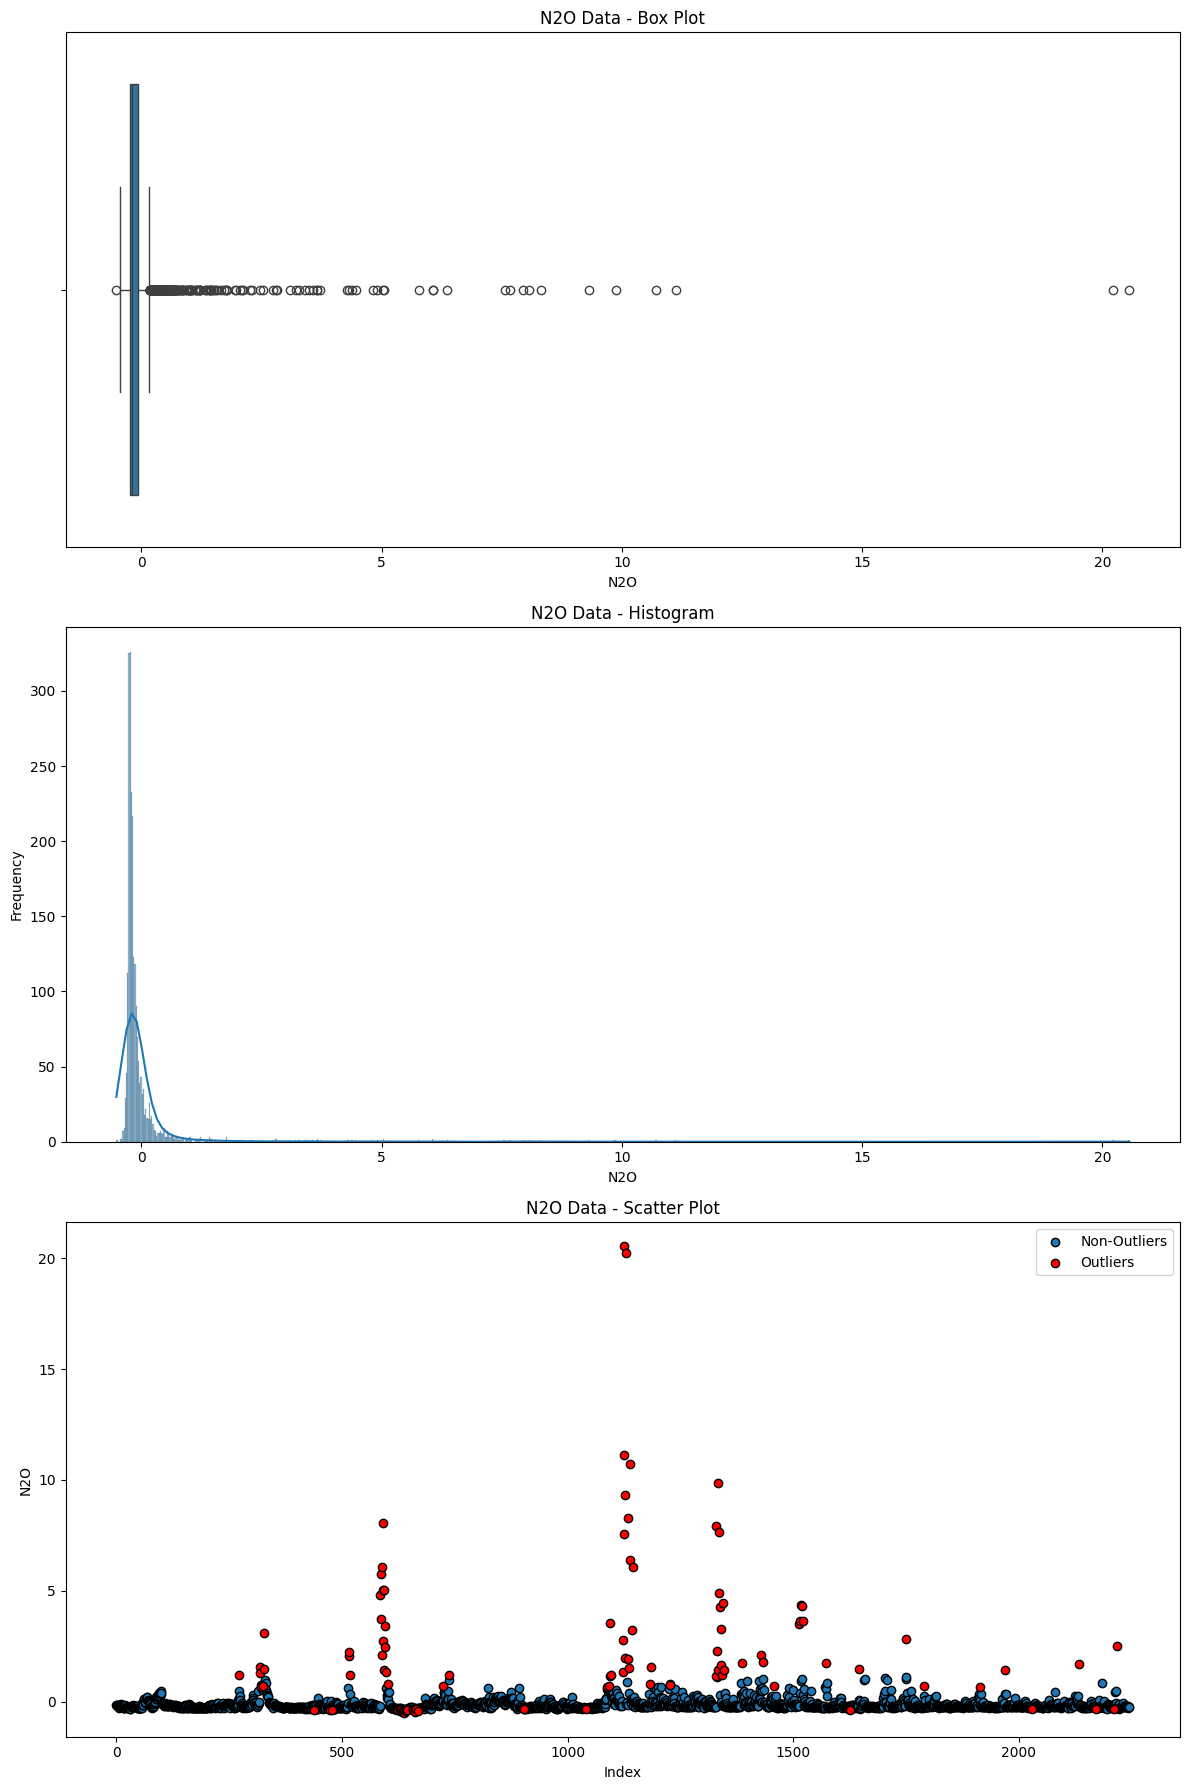

In [22]:
N2O_data = data[['N2O']]
# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['Outlier'] = ocsvm_pred

# Separate outliers and non-outliers
outliers = data[data['Outlier'] == -1]
non_outliers = data[data['Outlier'] != -1]

# Summary of results
outlier_count = outliers.shape[0]
summary_table = pd.DataFrame({
    'Method': ['One-Class SVM'],
    'Outlier Count': [outlier_count]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/04.n2o_outlier_summary_ocsvm.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Box Plot - N2O Data
sns.boxplot(x=data['N2O'], ax=axs[0])
axs[0].set_title('N2O Data - Box Plot')
axs[0].set_xlabel('N2O')

# Histogram - N2O Data
sns.histplot(data['N2O'], kde=True, ax=axs[1])
axs[1].set_title('N2O Data - Histogram')
axs[1].set_xlabel('N2O')
axs[1].set_ylabel('Frequency')

# Scatter Plot - N2O Data
axs[2].scatter(non_outliers.index, non_outliers['N2O'], label='Non-Outliers', edgecolor='k')
axs[2].scatter(outliers.index, outliers['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2].set_title('N2O Data - Scatter Plot')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('N2O')
axs[2].legend()

# Adjust layout
plt.savefig('01.Dataset-Rofiqul/Visual/005_OCSVMoutlier_VS_Filtered_Comparison.png')

plt.tight_layout()
plt.show()

## Detection Outlier Comparison

             Method  Outlier Count
0  Isolation Forest            113
1            DBSCAN             37
2     One-Class SVM            112


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


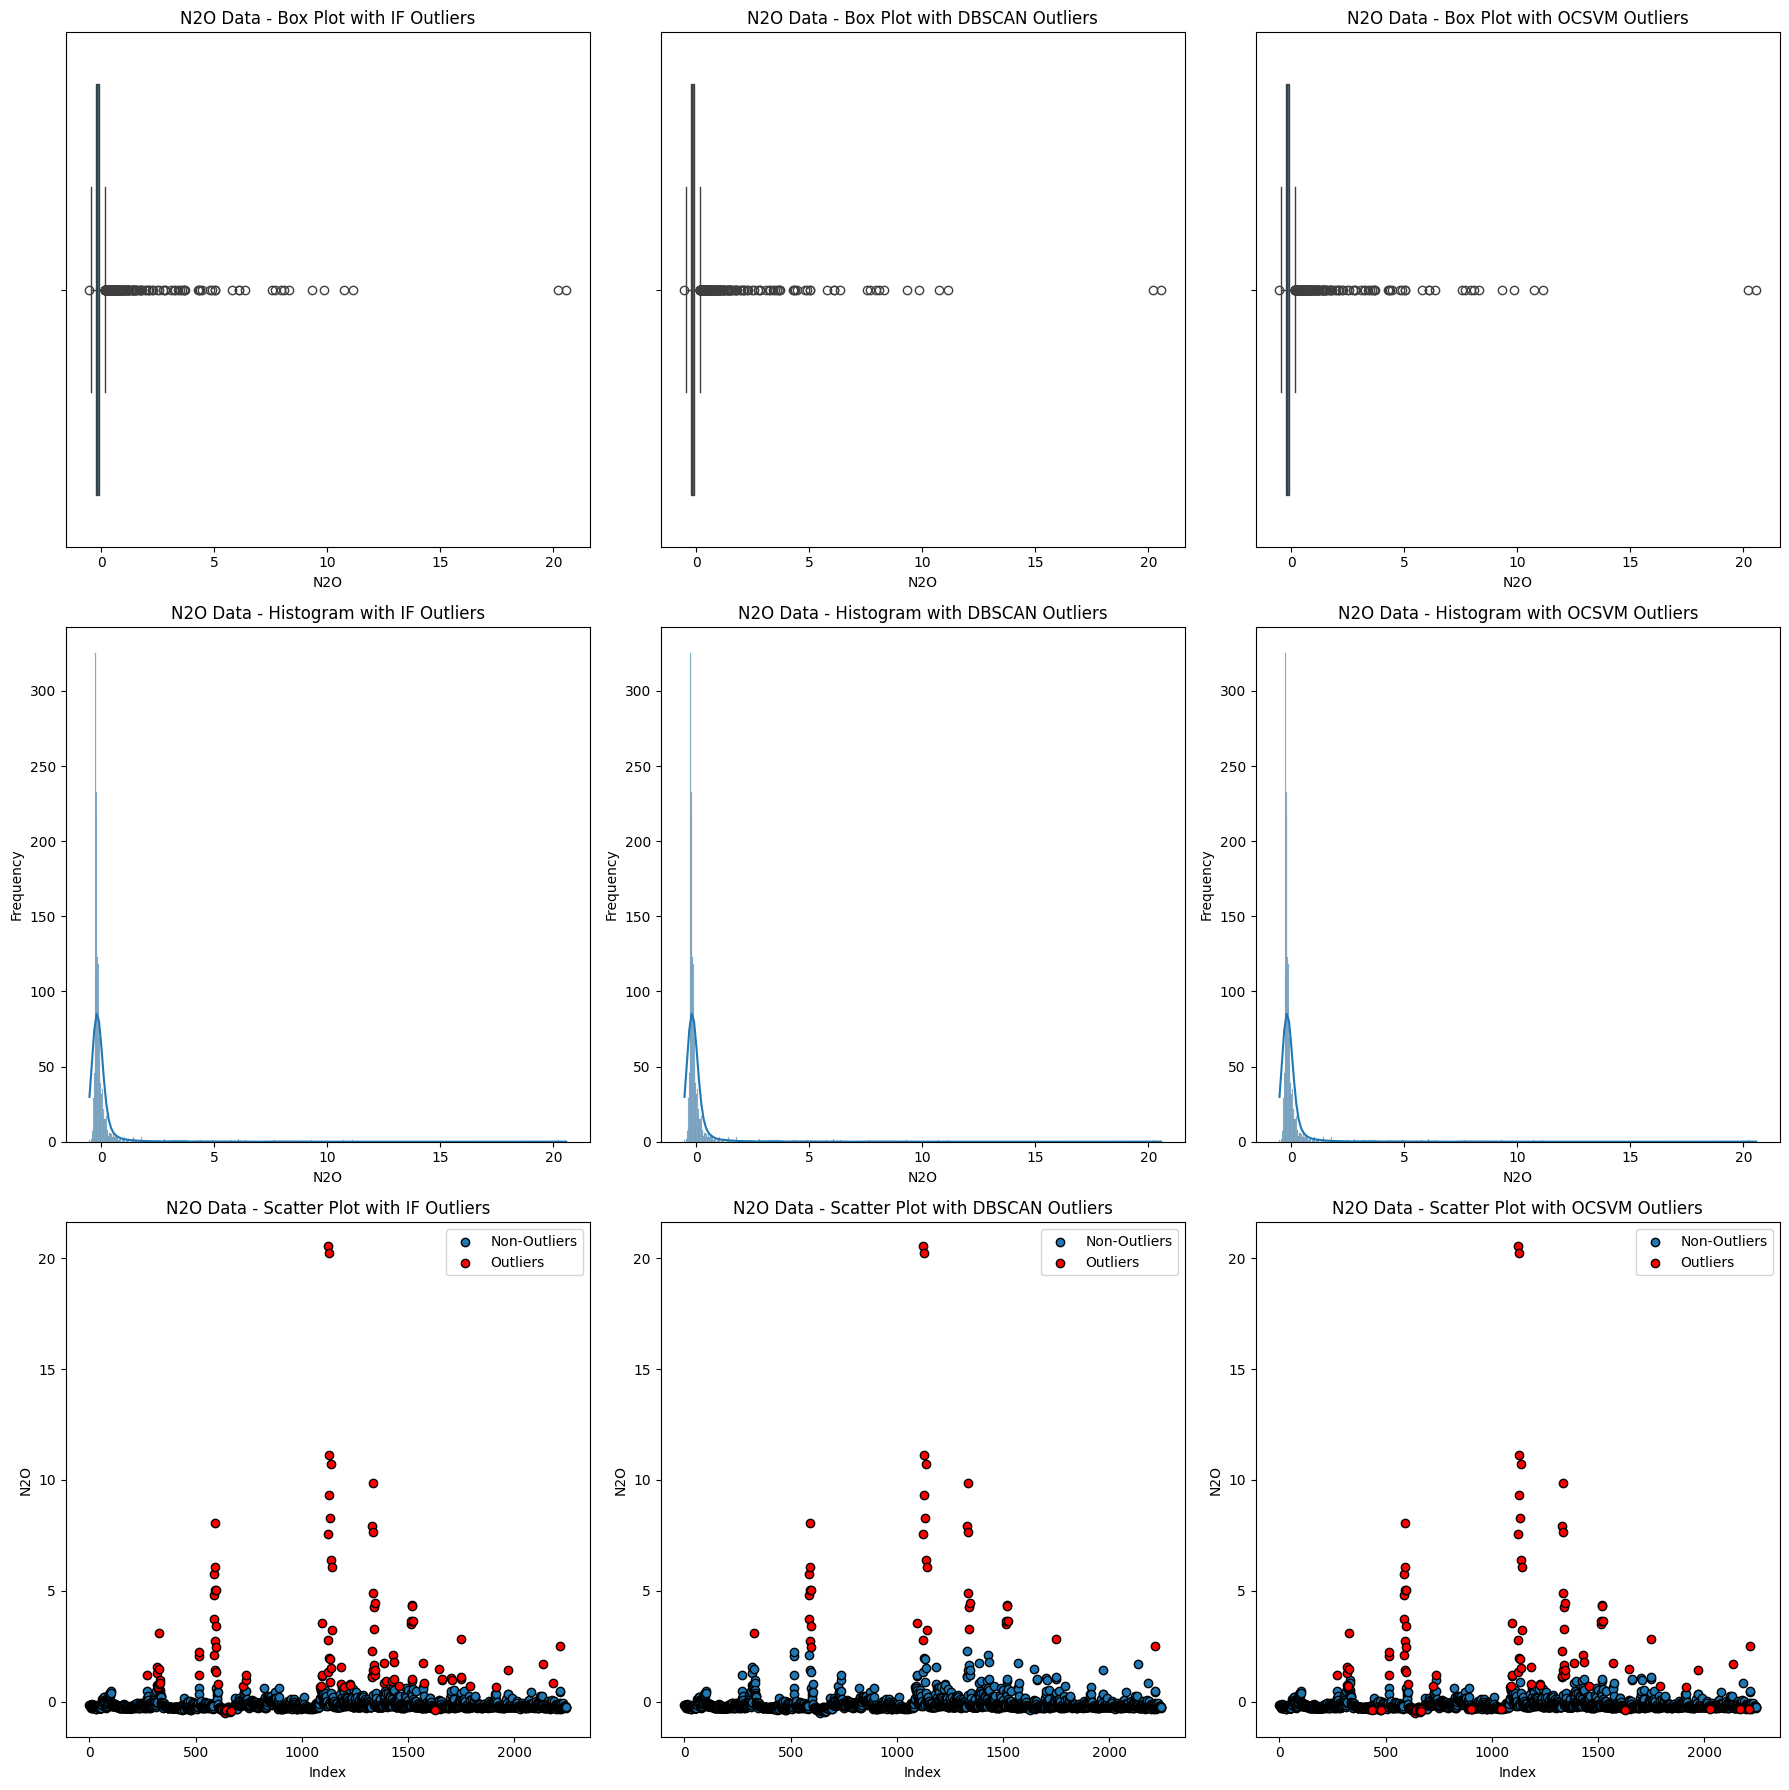

In [23]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred
data['DBSCAN_Outlier'] = dbscan_pred
data['OCSVM_Outlier'] = ocsvm_pred

# Separate outliers and non-outliers for each method
outliers_if = data[data['IF_Outlier'] == -1]
non_outliers_if = data[data['IF_Outlier'] != -1]

outliers_dbscan = data[data['DBSCAN_Outlier'] == -1]
non_outliers_dbscan = data[data['DBSCAN_Outlier'] != -1]

outliers_ocsvm = data[data['OCSVM_Outlier'] == -1]
non_outliers_ocsvm = data[data['OCSVM_Outlier'] != -1]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [outliers_if.shape[0], outliers_dbscan.shape[0], outliers_ocsvm.shape[0]]
})

# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/05.N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)

# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(non_outliers_if.index, non_outliers_if['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 0].scatter(outliers_if.index, outliers_if['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')
axs[2, 0].legend()

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(non_outliers_dbscan.index, non_outliers_dbscan['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 1].scatter(outliers_dbscan.index, outliers_dbscan['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')
axs[2, 1].legend()

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(non_outliers_ocsvm.index, non_outliers_ocsvm['N2O'], label='Non-Outliers', edgecolor='k')
axs[2, 2].scatter(outliers_ocsvm.index, outliers_ocsvm['N2O'], label='Outliers', color='red', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')
axs[2, 2].legend()
plt.savefig('01.Dataset-Rofiqul/Visual/005_Outlier_IF_DBSCAN_OneSVM_Comparison.png')

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,WFPS25cm,NH4,NO3,Clay,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,0.797637,-0.031188,-0.083017,-0.904182,0.796768,-0.642242,1,1,0,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,0.645128,-0.034134,-0.082259,-0.904182,0.796768,-0.642242,1,1,0,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,1.160223,-0.047719,-0.071667,-0.904182,0.796768,-0.642242,1,1,0,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,0.917547,-0.046323,-0.069647,-0.904182,0.796768,-0.642242,1,1,0,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,1.090364,-0.095994,-0.031903,-0.904182,0.796768,-0.642242,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.829336,0.432024,-0.774893,-0.076581,0.132085,-0.084319,1,1,0,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-1.260143,-0.448672,-0.789985,0.352933,0.126198,-0.357662,1,1,0,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-1.116541,-0.611951,-0.716945,0.613785,-0.135877,-0.631005,1,1,0,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.972939,-0.601740,-0.668688,0.445122,-0.199876,-0.069133,1,1,0,1


In [25]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Label'] = ['outlier' if x == -1 else 'not outlier' for x in iso_pred]
data['DBSCAN_Label'] = ['outlier' if x == -1 else 'not outlier' for x in dbscan_pred]
data['OCSVM_Label'] = ['outlier' if x == -1 else 'not outlier' for x in ocsvm_pred]

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        data[data['IF_Label'] == 'outlier'].shape[0],
        data[data['DBSCAN_Label'] == 'outlier'].shape[0],
        data[data['OCSVM_Label'] == 'outlier'].shape[0]
    ]
})

# Add the prediction results to the dataset
data['IF_Outlier'] = iso_pred
data['DBSCAN_Outlier'] = dbscan_pred
data['OCSVM_Outlier'] = ocsvm_pred

# Calculate the number of outliers for each method
outlier_counts = {
    'Isolation Forest': (data['IF_Outlier'] == -1).sum(),
    'DBSCAN': (data['DBSCAN_Outlier'] == -1).sum(),
    'One-Class SVM': (data['OCSVM_Outlier'] == -1).sum()
}
# Save the updated dataset to a new CSV file
updated_file_path = '01.Dataset-Rofiqul/06.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

In [26]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.904182,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.076581,0.132085,-0.084319,1,1,0,1,not outlier,not outlier,not outlier
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,0.352933,0.126198,-0.357662,1,1,0,1,not outlier,not outlier,not outlier
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,0.613785,-0.135877,-0.631005,1,1,0,1,not outlier,not outlier,not outlier
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,0.445122,-0.199876,-0.069133,1,1,0,1,not outlier,not outlier,not outlier


In [27]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)

# Add the prediction results to the dataset
data['IF_Outlier'] = ['outlier' if pred == -1 else 'not outlier' for pred in iso_pred]

# Save the updated dataset to a new CSV file
updated_file_path = '01.Dataset-Rofiqul/07.standard_scaler_agriculture_dataset_with_outliers.csv'
data.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataset
print(data.head())

      Date      Year Experiment   DataUse Replication     Month Vegetation  \
0   2/9/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
1  2/10/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
2  2/18/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
3  2/19/12  0.020682   BCSE_KBS  Building          R1  February       Corn   
4  3/16/12  0.020682   BCSE_KBS  Building          R1     March       Corn   

  VegType       N2O    N_rate  ...      Clay      Sand       SOM  Outlier  \
0  Annual -0.125408  0.481233  ... -0.904182  0.796768 -0.642242        1   
1  Annual -0.185324  0.481233  ... -0.904182  0.796768 -0.642242        1   
2  Annual -0.137842  0.481233  ... -0.904182  0.796768 -0.642242        1   
3  Annual -0.144855  0.481233  ... -0.904182  0.796768 -0.642242        1   
4  Annual -0.158726  0.481233  ... -0.904182  0.796768 -0.642242        1   

    IF_Outlier  DBSCAN_Outlier  OCSVM_Outlier     IF_Label  DBSCAN_L

In [28]:
# Extract the feature for outlier detection
N2O_data = data[['N2O']]
# Apply Isolation Forest
iso = IsolationForest(contamination=0.05)
iso_pred = iso.fit_predict(N2O_data)
data['IF_Outlier'] = iso_pred

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_pred = dbscan.fit_predict(N2O_data)
data['DBSCAN_Outlier'] = dbscan_pred

# Apply One-Class SVM
ocsvm = OneClassSVM(nu=0.05)
ocsvm_pred = ocsvm.fit_predict(N2O_data)
data['OCSVM_Outlier'] = ocsvm_pred

# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum()
    ]
})

In [29]:
# Save the summary table to a CSV file
summary_file_path = '01.Dataset-Rofiqul/008_N2O_outlier_comparison_summary.csv'
summary_table.to_csv(summary_file_path, index=False)
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,112,2134
1,DBSCAN,37,2209
2,One-Class SVM,112,2134


In [30]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/009_N2O_standard_scaler_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)

             Method  Outlier Count  Inlier Count
0  Isolation Forest            112          2134
1            DBSCAN             37          2209
2     One-Class SVM            112          2134


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


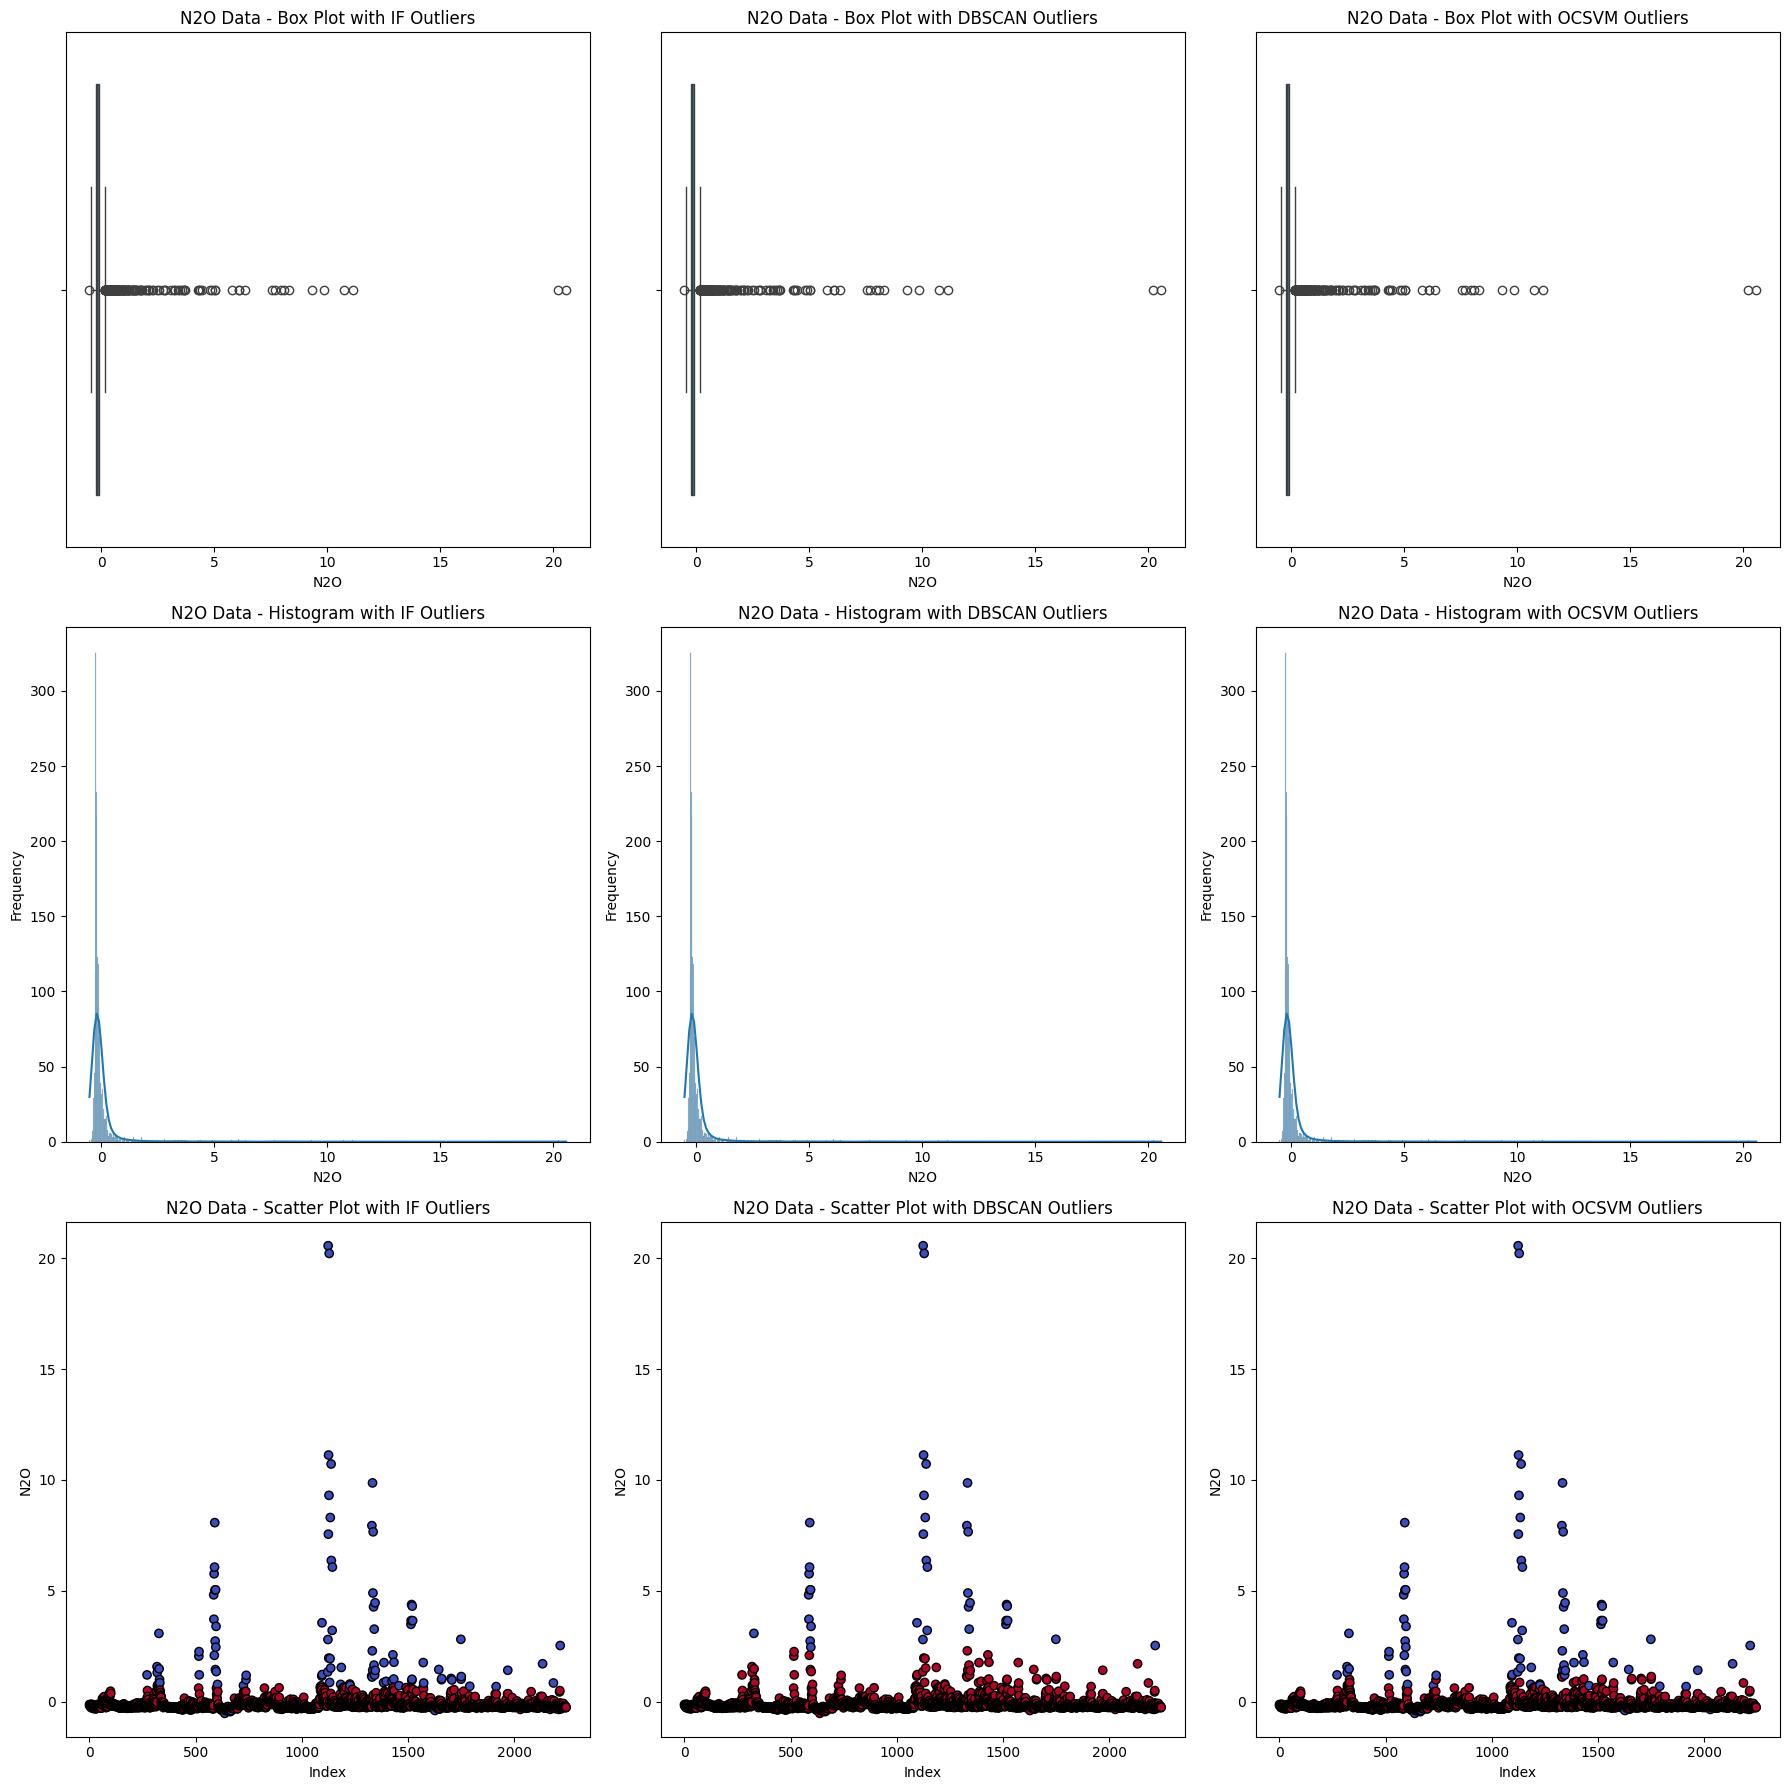

In [31]:
# Display the summary table
print(summary_table)

# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Box Plot - N2O Data with IF Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Box Plot with IF Outliers')
axs[0, 0].set_xlabel('N2O')

# Box Plot - N2O Data with DBSCAN Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Box Plot with DBSCAN Outliers')
axs[0, 1].set_xlabel('N2O')

# Box Plot - N2O Data with OCSVM Outliers
sns.boxplot(x=data['N2O'], ax=axs[0, 2])
axs[0, 2].set_title('N2O Data - Box Plot with OCSVM Outliers')
axs[0, 2].set_xlabel('N2O')

# Histogram - N2O Data with IF Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('N2O Data - Histogram with IF Outliers')
axs[1, 0].set_xlabel('N2O')
axs[1, 0].set_ylabel('Frequency')

# Histogram - N2O Data with DBSCAN Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('N2O Data - Histogram with DBSCAN Outliers')
axs[1, 1].set_xlabel('N2O')
axs[1, 1].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(data['N2O'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[1, 2].set_xlabel('N2O')
axs[1, 2].set_ylabel('Frequency')

# Scatter Plot - N2O Data with IF Outliers
axs[2, 0].scatter(data.index, data['N2O'], c=data['IF_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 0].set_title('N2O Data - Scatter Plot with IF Outliers')
axs[2, 0].set_xlabel('Index')
axs[2, 0].set_ylabel('N2O')

# Scatter Plot - N2O Data with DBSCAN Outliers
axs[2, 1].scatter(data.index, data['N2O'], c=data['DBSCAN_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 1].set_title('N2O Data - Scatter Plot with DBSCAN Outliers')
axs[2, 1].set_xlabel('Index')
axs[2, 1].set_ylabel('N2O')

# Scatter Plot - N2O Data with OCSVM Outliers
axs[2, 2].scatter(data.index, data['N2O'], c=data['OCSVM_Outlier'], cmap='coolwarm', edgecolor='k')
axs[2, 2].set_title('N2O Data - Scatter Plot with OCSVM Outliers')
axs[2, 2].set_xlabel('Index')
axs[2, 2].set_ylabel('N2O')

# Adjust layout
plt.tight_layout()
plt.show()

## Hard Voting Method

In [32]:
# Generate hard voting label
data['Hard_Voting_Outlier'] = data[['IF_Outlier', 'DBSCAN_Outlier', 'OCSVM_Outlier']].sum(axis=1).apply(lambda x: -1 if x < 0 else 1)


In [33]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/010_N2O_Hard_Voting_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Sand,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label,Hard_Voting_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,0.796768,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,0.132085,-0.084319,1,1,0,1,not outlier,not outlier,not outlier,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,0.126198,-0.357662,1,1,0,1,not outlier,not outlier,not outlier,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.135877,-0.631005,1,1,0,1,not outlier,not outlier,not outlier,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.199876,-0.069133,1,1,0,1,not outlier,not outlier,not outlier,1


## Hard Voting Visualization

In [34]:
# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM', 'Hard Voting'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum(),
        (data['Hard_Voting_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum(),
        (data['Hard_Voting_Outlier'] == 1).sum()
    ]
})
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/011_N2O_Hard_Voting_agriculture_dataset_summary.csv'
summary_table.to_csv(updated_file_path, index=False)
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,112,2134
1,DBSCAN,37,2209
2,One-Class SVM,112,2134
3,Hard Voting,91,2155


## Soft Voting Method

In [35]:
# Implement soft voting
data['Soft_Vote_Outlier'] = (data[['IF_Outlier', 'DBSCAN_Outlier', 'OCSVM_Outlier']] == -1).sum(axis=1) > 1
data['Soft_Vote_Outlier'] = data['Soft_Vote_Outlier'].apply(lambda x: -1 if x else 1)
data


,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label,Hard_Voting_Outlier,Soft_Vote_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.084319,1,1,0,1,not outlier,not outlier,not outlier,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.357662,1,1,0,1,not outlier,not outlier,not outlier,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.631005,1,1,0,1,not outlier,not outlier,not outlier,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.069133,1,1,0,1,not outlier,not outlier,not outlier,1,1


In [36]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/012_N2O_Soft_Voting_agriculture_dataset.csv'
data.to_csv(updated_file_path, index=False)

In [37]:
data

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,SOM,Outlier,IF_Outlier,DBSCAN_Outlier,OCSVM_Outlier,IF_Label,DBSCAN_Label,OCSVM_Label,Hard_Voting_Outlier,Soft_Vote_Outlier
0,2/9/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.125408,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
1,2/10/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.185324,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
2,2/18/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.137842,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
3,2/19/12,0.020682,BCSE_KBS,Building,R1,February,Corn,Annual,-0.144855,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
4,3/16/12,0.020682,BCSE_KBS,Building,R1,March,Corn,Annual,-0.158726,0.481233,...,-0.642242,1,1,0,1,not outlier,not outlier,not outlier,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,0.297184,MCSE-T2,Testing,R4,October,TRIAE,Annual,-0.204643,-0.926517,...,-0.084319,1,1,0,1,not outlier,not outlier,not outlier,1,1
2242,11/15/2013,0.297184,MCSE-T2,Testing,R1,November,TRIAE,Annual,-0.227464,-0.926517,...,-0.357662,1,1,0,1,not outlier,not outlier,not outlier,1,1
2243,11/15/2013,0.297184,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.269245,-0.926517,...,-0.631005,1,1,0,1,not outlier,not outlier,not outlier,1,1
2244,11/15/2013,0.297184,MCSE-T2,Testing,R3,November,TRIAE,Annual,-0.251690,-0.926517,...,-0.069133,1,1,0,1,not outlier,not outlier,not outlier,1,1


In [38]:
# Summary of results
summary_table = pd.DataFrame({
    'Method': ['Isolation Forest', 'DBSCAN', 'One-Class SVM', 'Hard Voting','Soft Voting'],
    'Outlier Count': [
        (data['IF_Outlier'] == -1).sum(),
        (data['DBSCAN_Outlier'] == -1).sum(),
        (data['OCSVM_Outlier'] == -1).sum(),
        (data['Hard_Voting_Outlier'] == -1).sum(),
        (data['Soft_Vote_Outlier'] == -1).sum()
    ],
    'Inlier Count': [
        (data['IF_Outlier'] == 1).sum(),
        (data['DBSCAN_Outlier'] != -1).sum(),
        (data['OCSVM_Outlier'] == 1).sum(),
        (data['Hard_Voting_Outlier'] == 1).sum(),
        (data['Soft_Vote_Outlier'] == 1).sum()
    ]
})
summary_table

,Method,Outlier Count,Inlier Count
0,Isolation Forest,112,2134
1,DBSCAN,37,2209
2,One-Class SVM,112,2134
3,Hard Voting,91,2155
4,Soft Voting,91,2155


In [39]:
# Save the updated dataset with outlier labels
updated_file_path = '01.Dataset-Rofiqul/012_N2O_After_Voting_SummaryTable.csv'
summary_table.to_csv(updated_file_path, index=False)

## Prepare to Train & Test

In [40]:
# Load the dataset
file_path = '01.Dataset-Rofiqul/012_N2O_Soft_Voting_agriculture_dataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2246 non-null   object 
 1   Year                 2246 non-null   float64
 2   Experiment           2246 non-null   object 
 3   DataUse              2246 non-null   object 
 4   Replication          2246 non-null   object 
 5   Month                2246 non-null   object 
 6   Vegetation           2246 non-null   object 
 7   VegType              2246 non-null   object 
 8   N2O                  2246 non-null   float64
 9   N_rate               2246 non-null   float64
 10  PP2                  2246 non-null   float64
 11  PP7                  2246 non-null   float64
 12  AirT                 2246 non-null   float64
 13  DAF_TD               2246 non-null   float64
 14  DAF_SD               2246 non-null   float64
 15  WFPS25cm             2246 non-null   f

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values if any (impute or drop)
data = data.dropna()


Missing values in each column:
 Date                   0
Year                   0
Experiment             0
DataUse                0
Replication            0
Month                  0
Vegetation             0
VegType                0
N2O                    0
N_rate                 0
PP2                    0
PP7                    0
AirT                   0
DAF_TD                 0
DAF_SD                 0
WFPS25cm               0
NH4                    0
NO3                    0
Clay                   0
Sand                   0
SOM                    0
Outlier                0
IF_Outlier             0
DBSCAN_Outlier         0
OCSVM_Outlier          0
IF_Label               0
DBSCAN_Label           0
OCSVM_Label            0
Hard_Voting_Outlier    0
Soft_Vote_Outlier      0
dtype: int64


## Split Dataset

In [42]:

# Encode categorical variables if any
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into features and target variable
X = data.drop(columns=['N2O'])
y = data['N2O']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1796, 29) (450, 29) (1796,) (450,)


##Training XGBoost Model

In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.5172255563213648
Root Mean Squared Error: 0.7191839516572688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Prediction with XGBoost

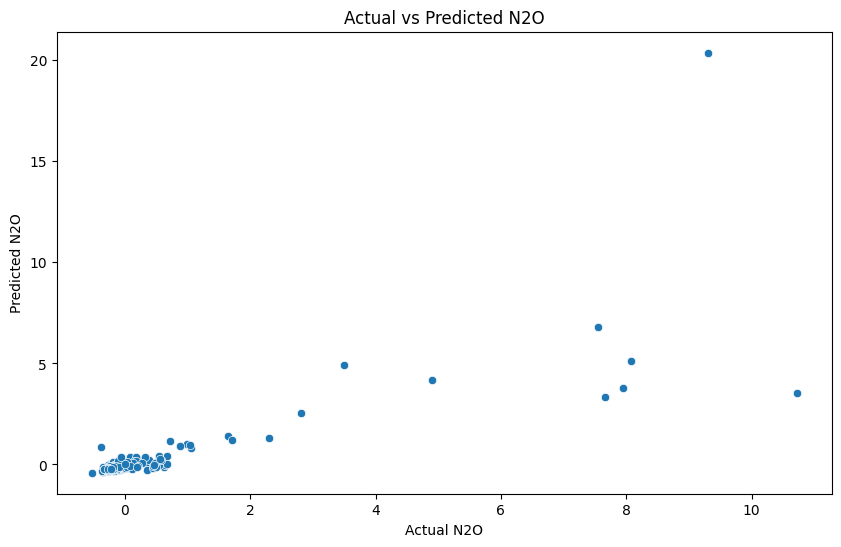

<Figure size 1000x600 with 0 Axes>

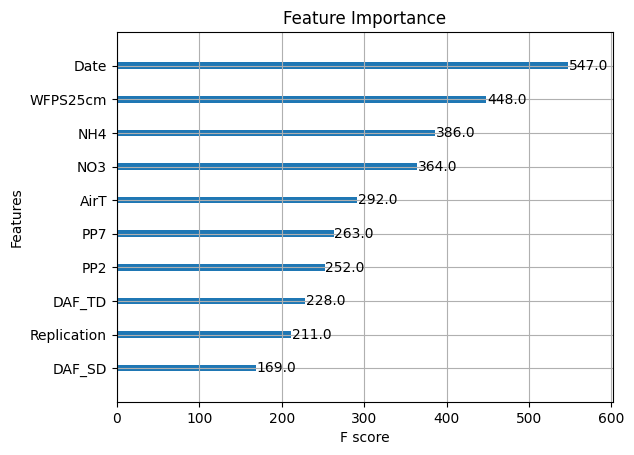

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual N2O')
plt.ylabel('Predicted N2O')
plt.title('Actual vs Predicted N2O')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title('Feature Importance')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
test_sizes = [0.25, 0.3, 0.35]
results = {}

for test_size in test_sizes:
    model, mse, rmse, mae, r2 = train_and_evaluate(test_size)
    results[test_size] = {'model': model, 'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Display the results
for test_size, metrics in results.items():
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"Root Mean Squared Error: {metrics['rmse']}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"R-squared: {metrics['r2']}")
    print("\n")

NameError: name 'train_and_evaluate' is not defined

In [ ]:
def train_and_evaluate(test_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual N2O')
    plt.ylabel('Predicted N2O')
    plt.title(f'Actual vs Predicted N2O (Test Size: {test_size})')
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Distribution (Test Size: {test_size})')
    plt.show()

    return model, mse, rmse, mae, r2

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

#Implement a function to perform hyperparameter tuning using GridSearchCV and RandomizedSearchCV
def hyperparameter_tuning(X_train, y_train, method='grid'):
    # Initialize the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    if method == 'grid':
        # GridSearchCV
        grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    elif method == 'random':
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        best_params = random_search.best_params_

    return best_model, best_params

#Train and evaluate the model for different test sizes
def train_evaluate_tuning(test_size, tuning_method='grid'):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Perform hyperparameter tuning
    best_model, best_params = hyperparameter_tuning(X_train, y_train, method=tuning_method)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Test Size: {test_size}, Tuning Method: {tuning_method}")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual N2O')
    plt.ylabel('Predicted N2O')
    plt.title(f'Actual vs Predicted N2O (Test Size: {test_size}, Tuning Method: {tuning_method})')
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Distribution (Test Size: {test_size}, Tuning Method: {tuning_method})')
    plt.show()

    return best_model, mse, rmse, mae, r2

#Compare the results across different test sizes and tuning methods

test_sizes = [0.2, 0.25, 0.3, 0.35]
tuning_methods = ['grid', 'random']
results = {}

for test_size in test_sizes:
    for method in tuning_methods:
        model, mse, rmse, mae, r2 = train_evaluate_tuning(test_size, tuning_method=method)
        results[(test_size, method)] = {'model': model, 'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}

# Display the results
for key, metrics in results.items():
    test_size, method = key
    print(f"Test Size: {test_size}, Tuning Method: {method}")
    print(f"Mean Squared Error: {metrics['mse']}")
    print(f"Root Mean Squared Error: {metrics['rmse']}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"R-squared: {metrics['r2']}")
    print("\n")



# N2O Metrics

In [ ]:

# Convert N₂O emissions to g N₂O-N ha⁻¹ d⁻¹
def convert_n2o_to_n(data):
    # Conversion factor from N₂O to N₂O-N (N₂O → N₂O-N)
    conversion_factor = 14 / 44
    data['N2O-N_ha_per_day'] = data['N2O'] * conversion_factor
    return data


# Convert the data to the required units (N₂O → N₂O-N ha⁻¹ d⁻¹)
data = convert_n2o_to_n(data)

# Select only the specified features
# Features (X): N_rate, AirT, WFPS25cm, NO3, NH4, Clay, Sand
X = data[['N_rate', 'AirT', 'WFPS25cm', 'NO3', 'NH4', 'Clay', 'Sand']]

# Target (y): N₂O-N ha⁻¹ d⁻¹ (converted N₂O emissions)
y = data['N2O-N_ha_per_day']

# Split the data into training and testing sets
def train_and_evaluate(test_size=0.2):
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

     # Get the index of the rows in the test set (useful for tracking)
    test_indices = X_test.index  # Extract the indices from X_test

    # Initialize the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

        # Store predictions in a DataFrame for easier reading
    results_df = pd.DataFrame({
        'Row/Index': test_indices,  # Add the index column to track the row from the original dataset
        'Actual N₂O-N (g N₂O-N ha⁻¹ d⁻¹)': y_test.values,
        'Predicted N₂O-N (g N₂O-N ha⁻¹ d⁻¹)': y_pred
    })

    # # Display the results as a table
    # print("Predictions Table:")
    # print(results_df.head())  # Display the first few rows of the table

    # Sort the DataFrame by predicted N₂O-N values in descending order
    results_df_sorted = results_df.sort_values(by='Predicted N₂O-N (g N₂O-N ha⁻¹ d⁻¹)', ascending=False)

    # Display the sorted results table
    pd.set_option('display.max_rows', None)  # Ensure all rows are shown
    print("\nSorted Predictions Table (Largest to Smallest Predictions):")
    print(results_df_sorted)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nTest Size: {test_size}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")

    # Visualize the results: Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual g N₂O-N ha⁻¹ d⁻¹')
    plt.ylabel('Predicted g N₂O-N ha⁻¹ d⁻¹')
    plt.title('Actual vs Predicted N₂O-N Emissions')
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals (g N₂O-N ha⁻¹ d⁻¹)')
    plt.ylabel('Frequency')
    plt.title('Residuals Distribution')
    plt.show()

    return model, mse, rmse, mae, r2, results_df  # Return the results table for further use

# Train and evaluate the model
model, mse, rmse, mae, r2, results_df = train_and_evaluate(test_size=0.2)

# Optionally, save the results to a CSV file for future analysis
results_df.to_csv('n2o_predictions.csv', index=False)
